In [61]:
import webbrowser as wb
# wb.open("https://www.scaler.com/academy/mentee-dashboard/class/83716/project/problems/17972?navref=cl_tt_crd_sl")
path=!cd
import os
os.startfile(path[0]+'\\Other')

In [37]:
path=!cd
import os
os.startfile(path[0]+'\\Other')

**Understand Business Problem**


In [1]:
import pandas as pd
df = pd.read_csv('Data_Jamboree.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [2]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['serial_no.', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor_', 'cgpa', 'research', 'chance_of_admit_'],
      dtype='object')

In [24]:
df.rename(columns={'chance_of_admit_':'chance_of_admit'}, inplace=True)
df.rename(columns={'lor_':'lor'}, inplace=True)

In [4]:
df.drop(columns=['serial_no.'], inplace=True)

In [25]:
df=df.convert_dtypes()
df.info()
# Misssing val columns
# Check Dtype change if needed 
# df['date'] = pd.to_datetime(df['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          500 non-null    Int64  
 1   toefl_score        500 non-null    Int64  
 2   university_rating  500 non-null    Int64  
 3   sop                500 non-null    Float64
 4   lor                500 non-null    Float64
 5   cgpa               500 non-null    Float64
 6   research           500 non-null    Int64  
 7   chance_of_admit    500 non-null    Float64
dtypes: Float64(4), Int64(4)
memory usage: 35.3 KB


In [60]:
df.describe().round(2)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,11.3,6.08,1.14,0.99,0.93,0.6,0.5,0.14
min,290.0,92.0,1.0,1.0,1.0,6.8,0.0,0.34
25%,308.0,103.0,2.0,2.5,3.0,8.13,0.0,0.63
50%,317.0,107.0,3.0,3.5,3.5,8.56,1.0,0.72
75%,325.0,112.0,4.0,4.0,4.0,9.04,1.0,0.82
max,340.0,120.0,5.0,5.0,5.0,9.92,1.0,0.97


In [26]:
df.nunique()
# Identity Records Columns

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa                 184
research               2
chance_of_admit       61
dtype: int64

df.drop('unnamed:_0', axis = 1, inplace=True)

In [10]:
# df.groupby('date')['driver_id'].nunique().sort_index(ascending=True)

**Understand the data**
- No categorical Column
- Granularity
  Data has records of 24 days of each month in 2 year containg drivers montly earning.
- Data also contails details of driver.
    
    Fixed info = Driver ID, Gender, City, Education, joiningdesignation, joiningdate, Lastdate
    
    Variabel info (based on date) = Income, Grade, Rating (deciding factors of target)

In [15]:
df['university_rating'].value_counts(normalize=True,dropna=False).round(2).sort_index()
# NaN can be filled with KNN

1       0.07
2       0.25
3       0.32
4       0.21
5       0.15
<NA>     0.0
Name: university_rating, dtype: Float64

In [13]:
df['research'].value_counts(normalize=True,dropna=False)
# NaN can be filled with KNN

1       0.56
0       0.44
<NA>     0.0
Name: research, dtype: Float64

In [16]:
# df.groupby('driver_id')['education_level'].nunique().sort_values(ascending=False)

In [ ]:
# # Function to impute missing values based on column type if missing value are between 0-10%
# def impute_missing_values(df):
#     for col in df.columns[df.isna().mean() > 0]:  # Columns with missing values
#         if df[col].dtype == 'object':  # Categorical columns
#             df[col].fillna(df[col].mode()[0], inplace=True)  # Impute mode
#         elif pd.api.types.is_numeric_dtype(df[col]):  # Numeric columns
#             df[col].fillna(df[col].mean(), inplace=True)  # Impute mean
#         else:
#             print(f"Column {col} has an unsupported data type for imputation.")
#     return df

# # Apply the function
# df = impute_missing_values(df)

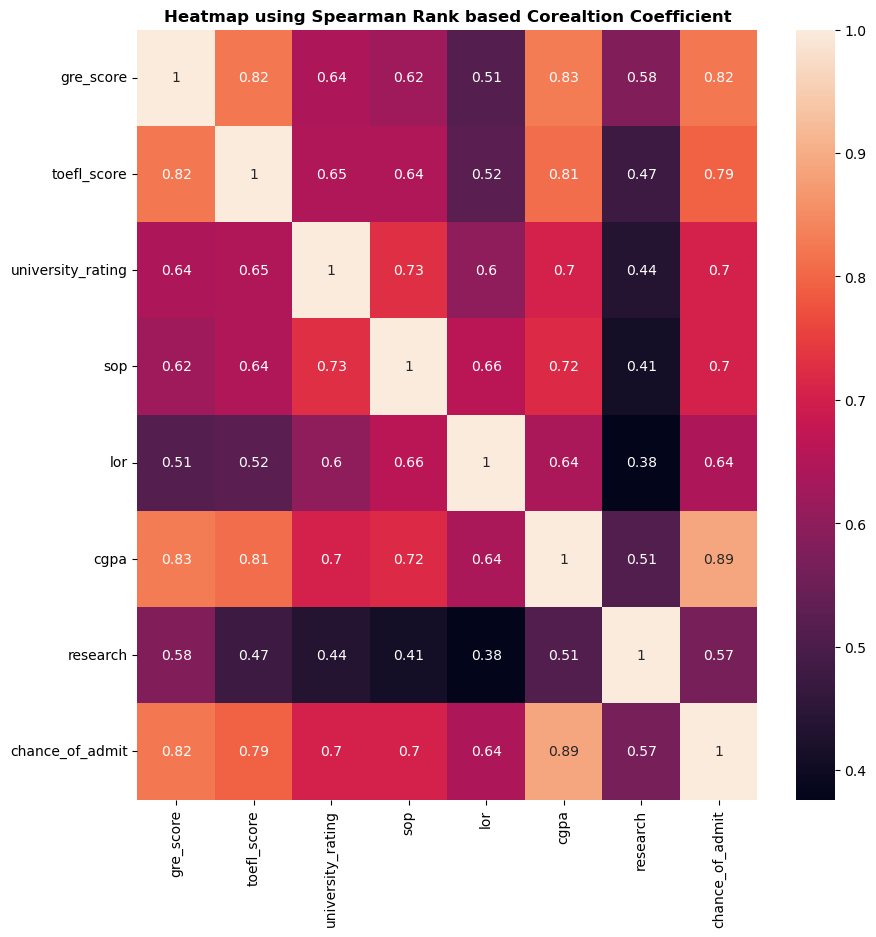

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize = (10,10))
sns.heatmap(numeric_df.corr(method = 'spearman'),annot=True)
plt.title(f"Heatmap using Spearman Rank based Corealtion Coefficient", fontweight = 'bold')
plt.show()

In [50]:
X = df.drop(['chance_of_admit'], axis = 1)
y = df['chance_of_admit']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.003585730291612243
0.8163213016062121
